# Selecting Data from PostgreSQL

## Introduction

Now that you've gotten a brief introduction to SQL, its time to get some hands on practice connecting to a database via Python and executing to some queries.

## Objectives

You will be able to:

* Understand the basic structure of a `SELECT` statement in SQL

## Connecting To a Database

First let's connect to our database by importing psycopg2 and running the following cell in our notebook. You'll need a cursor object (`cur`) to fetch results. Cursor objects allow you to keep track of which result set is which, since it's possible to run multiple queries before you're done fetching the results of the first.

```python 
import psycopg2
conn = psycopg2.connect('data_base_infos')
cur = conn.cursor()
```
you will not have `psycog2` already installed in your anaconda enviroment, so go ahead and execute the following to install pyscog2 to your `(base)(Python3.x.x)`

```python
$ conda activate base 
$ pip install psycopg2
$ conda deactivate
$ conda list  ** to check
```

In [6]:
# import postgresql realated libs 
import psycopg2
import pandas as pd 
import run_utility as ru 

In [7]:
# ConfigParser parses the config file 
from configparser import ConfigParser
config = ConfigParser()
config.read('config.ini')


['config.ini']

In [8]:
print(config.sections())

['YOUR_DATABASE', 'postgres']


Get the connection credential to connect to postgresql

In [9]:
database = config['postgres']['database']
host = config['postgres']['host']
port = config['postgres']['port']
user = config['postgres']['user']
password = config['postgres']['password']

print('Database: ', database)
print('Host: ', host)
print('Port: ', port)
print('User: ', user)

Database:  postgres
Host:  localhost
Port:  5432
User:  postgres


In [10]:
# creating a connection to postgresql
conn= ru.create_connection(
    databasename=database, 
    port=port, 
    hostname=host, 
    username=user,
    password=password)

Connecting to the postgreSQL database ...


Database connection created.


## Querying Via the Connection

Now that you're connected to the database, let's take a look at how you can query the data within.

With your cursor object, you can execute queries

In [11]:
cur = conn.cursor()                             # let us create a cursor now 
cur.execute('SELECT * FROM customer')                # execute the select query
result = cur.fetchall()                         # fetch the data and save it to a variable 

In [12]:
result

[(524,
  1,
  'Jared',
  'Ely',
  'jared.ely@sakilacustomer.org',
  530,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (1,
  1,
  'Mary',
  'Smith',
  'mary.smith@sakilacustomer.org',
  5,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (2,
  1,
  'Patricia',
  'Johnson',
  'patricia.johnson@sakilacustomer.org',
  6,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (3,
  1,
  'Linda',
  'Williams',
  'linda.williams@sakilacustomer.org',
  7,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (4,
  2,
  'Barbara',
  'Jones',
  'barbara.jones@sakilacustomer.org',
  8,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (5,
  1,
  'Elizabeth',
  'Brown',
  'elizabeth.brown@sakilacustomer.org',
  9,
  True,
  datetime.date(2006, 2, 14),
  dateti

In [13]:
cur.description

(Column(name='customer_id', type_code=23),
 Column(name='store_id', type_code=21),
 Column(name='first_name', type_code=1043),
 Column(name='last_name', type_code=1043),
 Column(name='email', type_code=1043),
 Column(name='address_id', type_code=21),
 Column(name='activebool', type_code=16),
 Column(name='create_date', type_code=1082),
 Column(name='last_update', type_code=1114),
 Column(name='active', type_code=23))

In [14]:
len(result)

599

It's also possible to combine the previous two cells into one line, like so:

In [15]:
## Uncomment cell to display contents:
cur.execute("SELECT * FROM customer")

# save it as data
data = cur.fetchall()
data

[(524,
  1,
  'Jared',
  'Ely',
  'jared.ely@sakilacustomer.org',
  530,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (1,
  1,
  'Mary',
  'Smith',
  'mary.smith@sakilacustomer.org',
  5,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (2,
  1,
  'Patricia',
  'Johnson',
  'patricia.johnson@sakilacustomer.org',
  6,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (3,
  1,
  'Linda',
  'Williams',
  'linda.williams@sakilacustomer.org',
  7,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (4,
  2,
  'Barbara',
  'Jones',
  'barbara.jones@sakilacustomer.org',
  8,
  True,
  datetime.date(2006, 2, 14),
  datetime.datetime(2013, 5, 26, 14, 49, 45, 738000),
  1),
 (5,
  1,
  'Elizabeth',
  'Brown',
  'elizabeth.brown@sakilacustomer.org',
  9,
  True,
  datetime.date(2006, 2, 14),
  dateti

In [16]:
data[-1][-1]

1

### Quick note on formatting syntax:

When working with strings, you may have previously seen a `'string'`, a `"string"`, a `'''string'''`, or a `"""string"""`. While all of these are strings, the triple quotes have the added functionality of being able to use multiple lines within the same string. Sometimes, SQL queries can be much longer than others, in which case it's helpful to use new lines for readability. Here's a short example:

In [17]:
## Uncomment cell to display contents:

# cur.execute("""SELECT * 
#                FROM emp 
#                LIMIT 5;""").fetchall()

## Wrapping Results Into Pandas DataFrames

Often, a more convenient output will be to turn these results into pandas DataFrames. To do this, you simply wrap the `c.fetchall()` output with a pandas DataFrame constructor:

In [20]:
cur.execute("""SELECT * FROM film""")                # execute the select query
df = pd.DataFrame(cur.fetchall())                   # fetch the data and convert it to Pandas DataFrame
df.head(10)                   

InFailedSqlTransaction: current transaction is aborted, commands ignored until end of transaction block


Sadly as you can see this is slightly clunky as we do not have the column names. 

We can access the column names by calling `cur.description`, like so:

In [ ]:
[x[0] for x in cur.description]

['film_id']

In [ ]:
# read our config file
from configparser import ConfigParser
config = ConfigParser()
config.read('config.ini')

# get the login credentials 
database = config['dvd_rental']['database']
host = config['dvd_rental']['host']
port = config['dvd_rental']['port']
user = config['dvd_rental']['user']
password = config['dvd_rental']['password']

# creating a connection to postgresql
conn= ru.create_connection(
    databasename=database, 
    port=port, 
    hostname=host, 
    username=user,
    password=password)

# let us create a cursor now 
cur = conn.cursor()
cur.execute("""SELECT * FROM film  """)
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df.head(5)

Connecting to the postgreSQL database ...
Database connection created.


,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,[Trailers],'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,[Trailers],'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,[Trailers],'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...


In [ ]:
df.dtypes

film_id                      int64
title                       object
description                 object
release_year                 int64
language_id                  int64
rental_duration              int64
rental_rate                 object
length                       int64
replacement_cost            object
rating                      object
last_update         datetime64[ns]
special_features            object
fulltext                    object
dtype: object

- Check out the documentation for more info on cursor methods and attributes [here](https://docs.python.org/2/library/sqlite3.html#sqlite3.Cursor).

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   film_id           1000 non-null   int64         
 1   title             1000 non-null   object        
 2   description       1000 non-null   object        
 3   release_year      1000 non-null   int64         
 4   language_id       1000 non-null   int64         
 5   rental_duration   1000 non-null   int64         
 6   rental_rate       1000 non-null   object        
 7   length            1000 non-null   int64         
 8   replacement_cost  1000 non-null   object        
 9   rating            1000 non-null   object        
 10  last_update       1000 non-null   datetime64[ns]
 11  special_features  1000 non-null   object        
 12  fulltext          1000 non-null   object        
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 101.7+ KB


In [ ]:
df.isnull().sum()

film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
last_update         0
special_features    0
fulltext            0
dtype: int64

In [ ]:
import seaborn as sns

<Axes: >

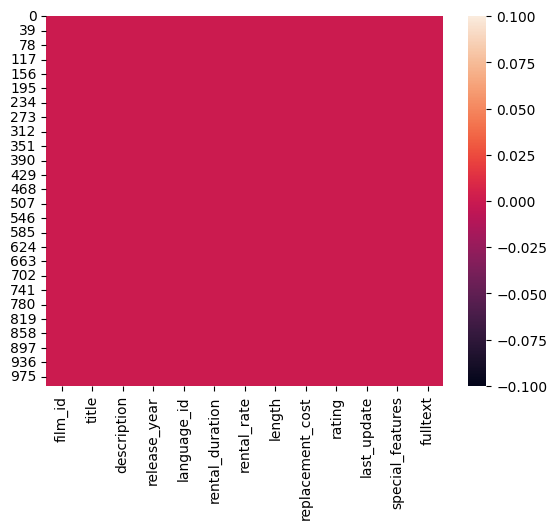

In [ ]:
sns.heatmap(df.isnull())

## The Where Clause

In general, the where clause filters query results by some condition. As you are starting to see, you can also combine multiple conditions.

### Selecting Customers From a Specific City

In [ ]:
cur.execute('SELECT * FROM film WHERE film_id = 1;')
df = pd.DataFrame(cur.fetchall())
df.columns = [x[0] for x in cur.description]
df

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'academi':1 'battl':15 'canadian':20 'dinosaur...


## Connecting to another table

In [ ]:
database = config['dvd_rental']['database']
host = config['dvd_rental']['host']
port = config['dvd_rental']['port']
user = config['dvd_rental']['user']
password = config['dvd_rental']['password']

# creating a connection to postgresql
conn= ru.create_connection(
    databasename=database, 
    port=port, 
    hostname=host, 
    username=user,
    password=password)

# let us create a cursor now 
cur = conn.cursor()
cur.execute('SELECT *  FROM customer ')

customers_df = pd.DataFrame(cur.fetchall())
customers_df.columns = [x[0] for x in cur.description]
customers_df.head()

Connecting to the postgreSQL database ...
Database connection created.


,customer_id,store_id,first_name,last_name,email,address_id,activebool,create_date,last_update,active
0,524,1,Jared,Ely,jared.ely@sakilacustomer.org,530,True,2006-02-14,2013-05-26 14:49:45.738,1
1,1,1,Mary,Smith,mary.smith@sakilacustomer.org,5,True,2006-02-14,2013-05-26 14:49:45.738,1
2,2,1,Patricia,Johnson,patricia.johnson@sakilacustomer.org,6,True,2006-02-14,2013-05-26 14:49:45.738,1
3,3,1,Linda,Williams,linda.williams@sakilacustomer.org,7,True,2006-02-14,2013-05-26 14:49:45.738,1
4,4,2,Barbara,Jones,barbara.jones@sakilacustomer.org,8,True,2006-02-14,2013-05-26 14:49:45.738,1


In [ ]:
customers_df.shape
# (599, xxxx)

(584, 2)

In [ ]:
cur.execute('SELECT * FROM rental')
rental_df = pd.DataFrame(cur.fetchall())
rental_df.columns = [x[0] for x in cur.description]
rental_df.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,last_update
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,2006-02-16 02:30:53
1,3,2005-05-24 23:03:39,1711,408,2005-06-01 22:12:39,1,2006-02-16 02:30:53
2,4,2005-05-24 23:04:41,2452,333,2005-06-03 01:43:41,2,2006-02-16 02:30:53
3,5,2005-05-24 23:05:21,2079,222,2005-06-02 04:33:21,1,2006-02-16 02:30:53
4,6,2005-05-24 23:08:07,2792,549,2005-05-27 01:32:07,1,2006-02-16 02:30:53


In [ ]:
sns.heatborn(rental_df())

AttributeError: module 'seaborn' has no attribute 'heatborn'

In [ ]:
final_df = customers_df.join(rental_df,on='customer_id', how='inner',lsuffix='_caller')[['email','address_id']]
final_df.head()

,email,address_id
0,jared.ely@sakilacustomer.org,530
1,mary.smith@sakilacustomer.org,5
2,patricia.johnson@sakilacustomer.org,6
3,linda.williams@sakilacustomer.org,7
4,barbara.jones@sakilacustomer.org,8


In [ ]:
customers_df['active'].value_counts()

active
1    584
Name: count, dtype: int64

In [ ]:
active_customers = customers_df[customers_df['active'] ==1]
over_100 = active_customers[active_customers['customer_id']>100]
less_than_200 = over_100[over_100['customer_id']<=200]
less_than_200.shape

(98, 2)

In [ ]:
result_df = customers_df[(customers_df['active'] == 1) & (customers_df['customer_id'].between(100,201))][['first_name','last_name','email']]
print(result_df.shape)
result_df.head()

KeyError: "None of [Index(['first_name', 'last_name', 'email'], dtype='object')] are in the [columns]"

In [ ]:
# Insert INTO
sql_query = """
    INSERT INTO students --(Name, Weight, Height, SmokeOrNot)
    VALUES (%s,%s,%s,%s);"""
cur.execute(sql_query, ('Sara',55,168,'No'))
conn.commit()

UndefinedTable: relation "students" does not exist
LINE 2:     INSERT INTO students --(Name, Weight, Height, SmokeOrNot...
                        ^


In [ ]:
cur.execute("""SELECT * FROM students;""")
new_studnet_df = pd.DataFrame(cur.fetchall())
new_studnet_df.columns = [x[0] for x in cur.description]
new_studnet_df

## Conecting to DVDRental database

In [ ]:
database = config['dvdrental']['database']
host = config['dvdrental']['host']
port = config['dvdrental']['port']
user = config['dvdrental']['user']
password = config['dvdrental']['password']

print('Database: ', database)
print('Host: ', host)
print('Port: ', port)
print('User: ', user)

KeyError: 'dvdrental'

In [ ]:
# creating a connection to postgresql
conn= ru.create_connection(
    databasename=database, 
    port=port, 
    hostname=host, 
    username=user,
    password=password)

Connecting to the postgreSQL database ...
Database connection created.


In [ ]:
# Define a schema and table name
schema = 'public'
table_name = 'customer'
sql_query = "SELECT * FROM {}.{}".format(schema, table_name)
values = None 

customers_df = ru.load_data(connection=conn, sql_query=sql_query, values=values)
customers_df.head()

Creating a pandas dataframe from the provided database connection and sql script started ...
connection already closed


InterfaceError: connection already closed

once we have the the data as a dataframe, we need to close the cursor and the connection by calling these two cods `cur.close()`, `conn.close()`

In [ ]:
## close the cursor
cur.close()

## close the connection 
conn.close()

## Summary

In this lesson, you saw how to connect to a SQL database via python and how to subsequently execute queries against that database. Going forward, you'll continue to learn additional keywords for specifying your query parameters!